<a href="https://colab.research.google.com/github/EliseuODaniel/Analise_temperatura_motor_eletrico/blob/main/Copy_of_analise_2_regressao_multipla_with_normal_test_train_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear Múltipla

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import os


#Data and Setup

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/notebooks/input/measures_v2.csv')

X = df[['ambient', 'coolant','i_q', 'u_q','i_d', 'u_d', 'motor_speed']]
y = df['pm']


#Train test split

In [39]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# Modelagem

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
test_predictions = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [47]:
MAE

9.273602494057618

In [48]:
MSE

143.54079870823813

In [49]:
RMSE

11.980851334869243

In [50]:
#valor médio das temperaturas do rotor em todo o dataset - para comparar com o RMSE
#ou seja, as previsões do modelo variam 12 para + e - de 58,51
df['pm'].mean()

58.50677585061459

In [51]:
model.coef_

array([ 3.35224902,  0.27229144, -0.02576537, -0.14521501, -0.01165514,
       -0.06488191,  0.0055882 ])

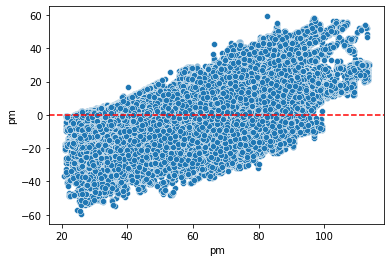

In [52]:
# plotagem da distribuição dos resíduos
test_res = y_test - test_predictions

sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

nota-se que os resíduos tem uma distribuição com tendencia crescente

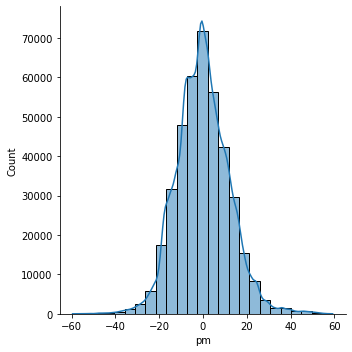

In [53]:
#plotagem da distribuição dos resíduos pra verificar visualmente a normalidade
sns.displot(test_res,bins=25,kde=True)

visualmente percebe-se uma distribuição normalmente distribuida, porém com um pico muito agudo

In [54]:
import scipy as sp

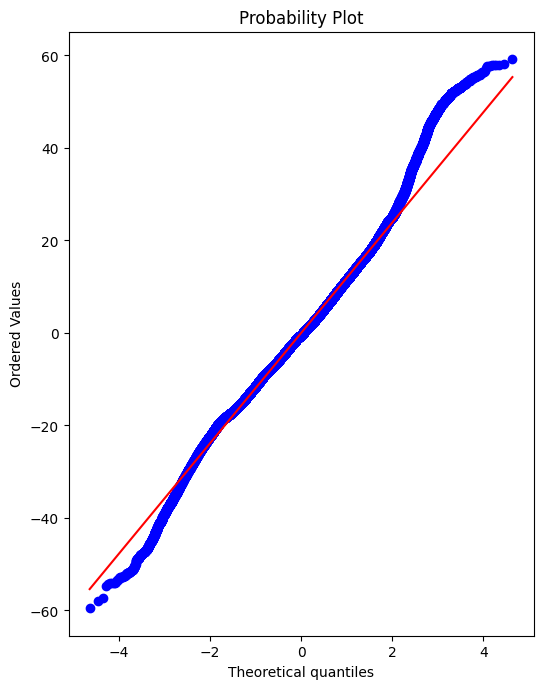

In [55]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

como os resíduos se afastam da linha vermelha (correspondente à normal) no início e no fim, percebe-se visualmente que não seguem uma distribuição normal

In [56]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 2.015e+05
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:25:52   Log-Likelihood:            -3.6352e+06
No. Observations:              931571   AIC:                         7.270e+06
Df Residuals:                  931563   BIC:                         7.271e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -39.5901      0.182   -217.775      0.000     -39.946     -39.234
ambient         3.3522      0.008    428.362      0.000       3.337       3.368
coolant         0.2723      0.001    403.191      0.000       0.271       0.274
i_q            -0.0258      0.000   -101.809      0.000      -0.026      -0.025
u_q            -0.1452      0.001   -227.627      0.000      -0.146      -0.144
i_d            -0.0117      0.000    -25.654      0.000      -0.013      -0.011
u_d            -0.0649      0.000   -181.810      0.000      -0.066      -0.064
motor_speed     0.0056   2.31e-05    242.335      0.000       0.006       0.006
==============================================================================
Omnibus:                    31507.466   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52663.683
Skew:                           0.303   Prob(JB):                         0.00
Kurtosis:                       3.995   Cond. No.                     4.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final Model

Aplicação do modelo de regressão linear em todos os dados do dataset, sem separar entre teste e treino.

In [57]:
final_model = LinearRegression()
final_model.fit(X,y)
y_hat = final_model.predict(X)

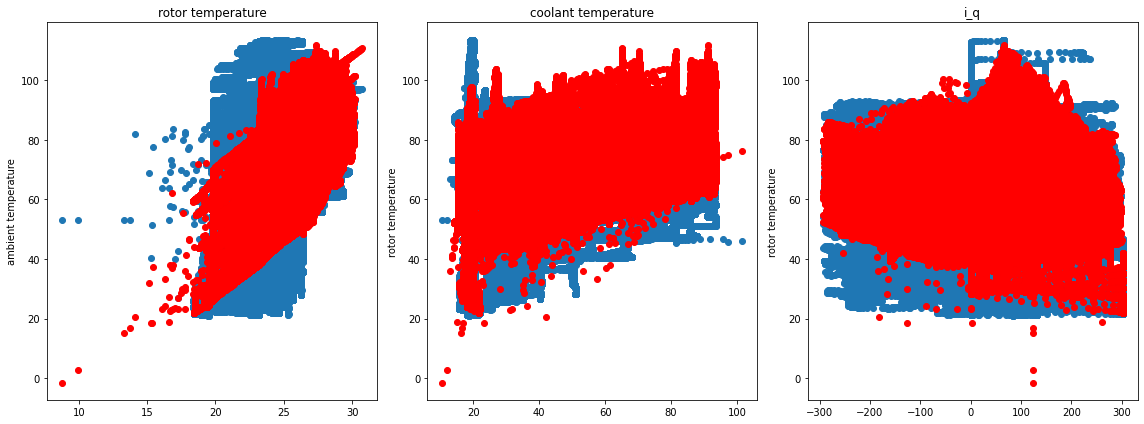

In [58]:
#visualização de como as predições do modelo (em vermelho) se comparam 
#com a distribuição dos dados reais do dataset


fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

# plotting the real data points
axes[0].plot(df['ambient'],df['pm'],'o')
#plotting the predicted data points in red
axes[0].plot(df['ambient'],y_hat,'o',color='red')
axes[0].set_ylabel("ambient temperature")
axes[0].set_title("rotor temperature")

axes[1].plot(df['coolant'],df['pm'],'o')
axes[1].plot(df['coolant'],y_hat,'o',color='red')
axes[1].set_title("coolant temperature")
axes[1].set_ylabel("rotor temperature")

axes[2].plot(df['i_q'],df['pm'],'o')
axes[2].plot(df['i_q'],y_hat,'o',color='red')
axes[2].set_title("i_q");
axes[2].set_ylabel("rotor temperature")
plt.tight_layout();

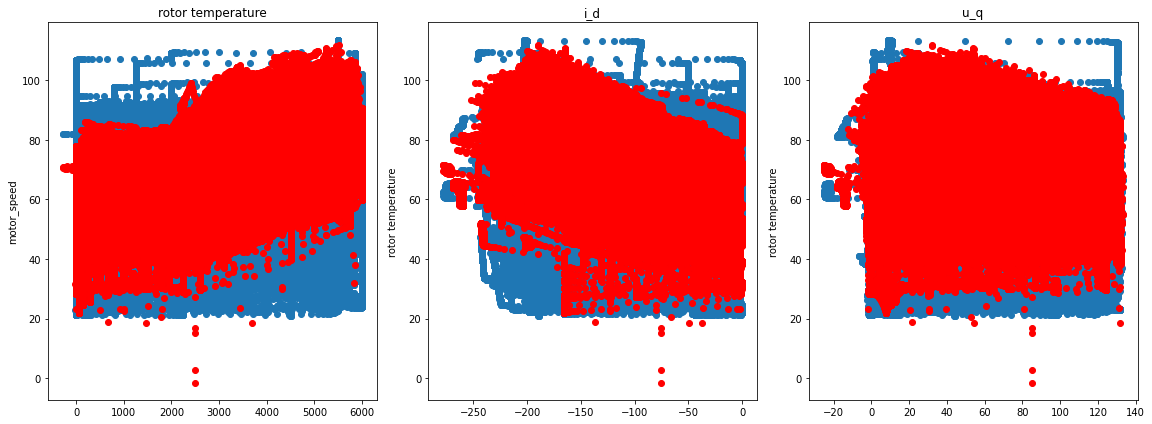

In [59]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

# plotting the real data points
axes[0].plot(df['motor_speed'],df['pm'],'o')
#plotting the predicted data points in red
axes[0].plot(df['motor_speed'],y_hat,'o',color='red')
axes[0].set_ylabel("motor_speed")
axes[0].set_title("rotor temperature")

axes[1].plot(df['i_d'],df['pm'],'o')
axes[1].plot(df['i_d'],y_hat,'o',color='red')
axes[1].set_title("i_d")
axes[1].set_ylabel("rotor temperature")

axes[2].plot(df['u_q'],df['pm'],'o')
axes[2].plot(df['u_q'],y_hat,'o',color='red')
axes[2].set_title("u_q");
axes[2].set_ylabel("rotor temperature")
plt.tight_layout();

In [60]:
residuals = y_hat - y

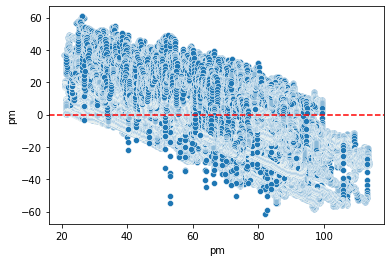

In [61]:
#plotagem de todos os resíduos

sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [62]:
#coeficientes no modelo final
final_model.coef_

array([ 3.35978567,  0.27191838, -0.02561786, -0.14545868, -0.01134362,
       -0.06481298,  0.0056019 ])

In [63]:
x2 = sm.add_constant(X)
model = sm.OLS(y, x2)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 2.881e+05
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:26:54   Log-Likelihood:            -5.1932e+06
No. Observations:             1330816   AIC:                         1.039e+07
Df Residuals:                 1330808   BIC:                         1.039e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -39.7694      0.152   -261.383      0.000     -40.068     -39.471
ambient         3.3598      0.007    512.969      0.000       3.347       3.373
coolant         0.2719      0.001    481.000      0.000       0.271       0.273
i_q            -0.0256      0.000   -120.999      0.000      -0.026      -0.025
u_q            -0.1455      0.001   -272.776      0.000      -0.147      -0.144
i_d            -0.0113      0.000    -29.869      0.000      -0.012      -0.011
u_d            -0.0648      0.000   -216.951      0.000      -0.065      -0.064
motor_speed     0.0056   1.93e-05    290.554      0.000       0.006       0.006
==============================================================================
Omnibus:                    44153.779   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73587.200
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                       3.984   Cond. No.                     4.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Olhando para os valores de p de cada variável, todos eles parecem ser significativos e estão prevendo a temperatura  do rotor, pois os valores de p são muito baixos.




# Análise dos resultados da regressão múltipla

O R² mostra que o modelo calculado explica em 60,2% dos valores mensurados.
A variável mais influente é ambient que, no momento da aferição, tem coeficiente linear de 3.3598. A segunda variável mais influente dada pelo modelo é a de temperatura do líquido de arrefecimento (coolant), com coeficiente linear de 0,2719.

Olhando para os valores de p de cada variável, todos eles parecem ser significativos e estão prevendo a temperatura do rotor do estator, pois os valores de p são muito baixos.

A pontuação do teste Durbin-Watson também está muito próxima de 0, portanto, podemos dizer que há uma autocorrelação positiva no conjunto de dados.

O valor Prob(JP) para o teste de Jarque-Bera é menor que 0,05, então rejeitamos a hipótese nula de que os resíduos (variação natural dos dados que o modelo não capturou) são normalmente distribuídos, conforme será mostrado visuamente abaixo. 


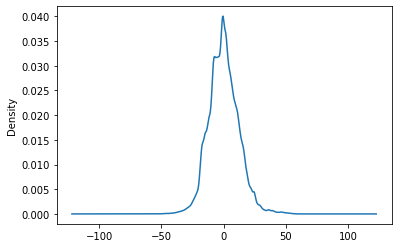

In [64]:
results.resid.plot(kind = 'density')

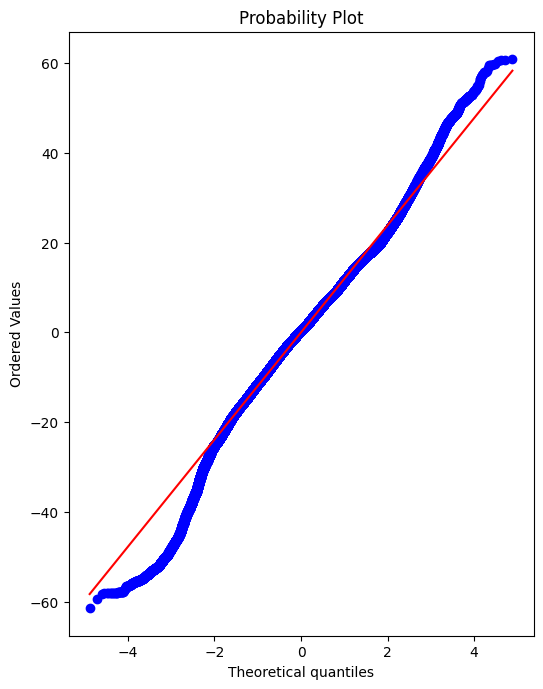

In [65]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(residuals,plot=ax)

Como podemos ver no gráfico de histograma dos resíduos, bem como na distibuição normal de probabilidade, os resíduos são baixos e distribuídos  ao redor do centro, mas se desviam da distribuição normal para os extremos, o que pode ser o fator que influencia o teste de JB e falhar no teste de normalidade.
